# Stationarity of busca model

  * Olmo et al shows that a log-logistic captures stationary distribution empirically
  * Stationary Point Processes with Markov-Dependent Intervals and Infinite Intensity details the true distribution
    - https://sci-hub.tw/https://www.jstor.org/stable/3213570
   
  
Here we shall compare both

In [47]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from gb.simulate import GrangeBuscaSimulator

from scipy.special import exp1
from scipy.special import expi
from scipy.stats.distributions import fisk

from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
def SFP(n, mu, rho=1):
    # first inter-event time
    deltat = mu
    # list of inter-event times
    Deltat = [deltat]
    for i in range(1, n):
        # Poisson Process which Beta=deltat+mu/e
        deltat = -(deltat+(mu**rho)/np.e)
        deltat = deltat * np.log(np.random.rand())
        Deltat.append(deltat**(1/rho))
    return Deltat

In [3]:
sim = GrangeBuscaSimulator([0.0], [np.e], [[1]])
ticks1 = sim.simulate(3000000)[0]
ticks1 = ticks1[:100000]

In [4]:
ticks2 = SFP(len(ticks1), np.e)

In [57]:
def stationary(x, lambda_, alpha=1.0):
    aux = (lambda_**2) / alpha
    c = 1.0 / (aux * np.exp(aux) * exp1(aux))
    pdf = np.exp(-lambda_ * x) / (lambda_ + alpha * x)
    return c * pdf

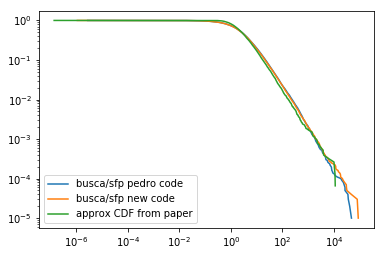

In [58]:
vals = ticks2
ecdf = ECDF(vals)
x_ticks = np.unique(vals)
plt.loglog(x_ticks, (1-ecdf(x_ticks)), label='busca/sfp pedro code')

vals = np.ediff1d(ticks1)
ecdf = ECDF(vals)
x_ticks = np.unique(vals)
plt.loglog(x_ticks, (1-ecdf(x_ticks)), label='busca/sfp new code')

tmp = stationary(x_ticks, 1.0).cumsum()
tmp = tmp / tmp.max()
plt.loglog(x_ticks/8, tmp[::-1], label='approx CDF from paper')

plt.legend()

In [7]:
from scipy.integrate import cumtrapz

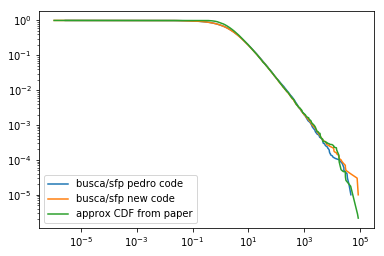

In [79]:
fx = stationary(x_ticks/5, 1.0, alpha=1)
Fx = cumtrapz(fx, x_ticks/5, initial=0)

vals = ticks2
ecdf = ECDF(vals)
x_ticks = np.unique(vals)
plt.loglog(x_ticks, (1-ecdf(x_ticks)), label='busca/sfp pedro code')

vals = np.ediff1d(ticks1)
ecdf = ECDF(vals)
x_ticks = np.unique(vals)
plt.loglog(x_ticks, (1-ecdf(x_ticks)), label='busca/sfp new code')

plt.loglog(x_ticks, Fx[::-1], label='approx CDF from paper')

plt.legend()